In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = np.loadtxt('/home/brianbg/Documents/ML2023/olympic100m_men.txt', delimiter=',').T

In [10]:
def w_regularizado(x, y, n, lamb):
    X = np.vstack([x**i for i in range(n+1)]).T
    XT = X.T
    w = np.linalg.inv(XT @ X + n * lamb * np.eye(n+1)) @ XT @ y
    return w

In [26]:
def weight_model(x, y, n=1):
    X = np.vstack([x**i for i in range(n+1)]).T
    XT = X.T
    w = np.linalg.inv(XT @ X) @ XT @ y
    return w

In [27]:
x = (data[0] - 1896)/4
y = data[1]

x_eje = np.linspace(np.min(x), np.max(x), 250)

In [45]:
w = weight_model(x,y,2)     
f=w[0]+w[1]*x+w[2]*x**2

w_r=w_regularizado(x,y,2,0.1)
f_r=w_r[0]+w_r[1]*x+w_r[2]*x**2

w_r_2=w_regularizado(x,y,2,0.05)
f_r_2=w_r_2[0]+w_r_2[1]*x+w_r_2[2]*x**2

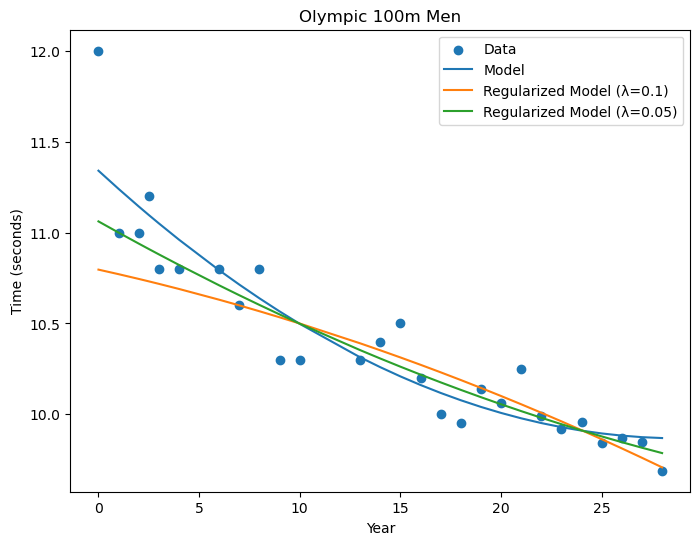

In [47]:
plt.figure(figsize=(8, 6))  # Set the figure size

# Scatter plot
plt.scatter(x, y, label='Data')

# Line plots
plt.plot(x, f, label='Model')
plt.plot(x, f_r, label='Regularized Model (λ=0.1)')
plt.plot(x, f_r_2, label='Regularized Model (λ=0.05)')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Time (seconds)')
plt.title('Olympic 100m Men')

# Add legend
plt.legend()

# Show the plot
plt.show()
